<a href="https://colab.research.google.com/github/AdithyaP7/SelfDrivingObjectDetection/blob/master/ObjectDetectionFinalPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to build and AI tool that can help Self Driving Cars "see" and pick up on objects that are on the road and classify them into different cateogries of what could be on the road.



**Click on this image for a demo of what this project aims to build!**
---




[<img src="https://i.ytimg.com/vi/2lxO_0FMalY/maxresdefault.jpg" width="500"/>](https://www.youtube.com/watch?v=9ydhDQaLAqM)

# Run the Cell Below to Download the Data and prepare the environment we are working with.


In [31]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

print("TensorFlow version: {}".format(tf.__version__))

# Load data
def load_cifar10():
  (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
  y_train_cifar = y_train_cifar.squeeze()
  y_test_cifar = y_test_cifar.squeeze()
  return (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar)

# CIFAR100 classes
idx_to_class = ['background', 'car', 'truck']

# Construct vehicle dataset from CIFAR10
def construct_vehicle_dataset(data, labels, images_per_class, label_car=1, label_truck=9):
  mask_car = labels == label_car
  mask_truck = labels == label_truck

  mask_vehicles = mask_car | mask_truck
  mask_background = np.invert(mask_vehicles)
  
  data_car = data[mask_car]
  data_truck = data[mask_truck]
  data_background = data[mask_background][:images_per_class]

  new_data = np.vstack((data_background, data_car, data_truck))
  new_labels = np.repeat(np.array([0, 1, 2]), images_per_class, axis=0)
  
  return new_data, new_labels

def load_vehicle_dataset():
  (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = load_cifar10()
  x_train, y_train = construct_vehicle_dataset(x_train_cifar, y_train_cifar, 5000)
  x_test, y_test = construct_vehicle_dataset(x_test_cifar, y_test_cifar, 1000)
  return (x_train, y_train), (x_test, y_test)

# Helper functions

# plotting
def plot_one_image(data, labels = [], index = None, image_shape = None):
  '''
  if data is a single image, display that image

  if data is a 4d stack of images, display that image
  '''
  ### cv2.imshow('image', data)    
  num_dims   = len(data.shape)
  num_labels = len(labels)
  if image_shape is not None:
    target_shape = image_shape
  else:
    target_shape = (32, 32, 3)
  # reshape data if necessary
  if num_dims == 1:
    data = data.reshape(target_shape)
  if num_dims == 2:
    data = data.reshape(np.vstack[-1, image_shape])
  num_dims   = len(data.shape)

  # check if single or multiple images
  if num_dims == 3:
    if num_labels > 1:
      print('Multiple labels does not make sense for single image.')
      return

    label = labels      
    if num_labels == 0:
      label = ''
    image = data

  if num_dims == 4:
    image = data[index, :]
    label = labels[index]

  # plot image of interest
  print('Label: %s'%label)
  plt.imshow(image)
  plt.show()

def model_to_string(model):
  import re
  stringlist = []
  model.summary(print_fn=lambda x: stringlist.append(x))
  sms = "\n".join(stringlist)
  sms = re.sub('_\d\d\d','', sms)
  sms = re.sub('_\d\d','', sms)
  sms = re.sub('_\d','', sms)  
  return sms

def normalize(data):
  # CIFAR100 mean (0.4914, 0.4822, 0.4465) std (0.2023, 0.1994, 0.2010)
  return (data/255-np.array((0.4914, 0.4822, 0.4465))) / np.array((0.2023, 0.1994, 0.2010))

def label_to_onehot(labels):
  final_labels = np.zeros((len(labels), 3))
  for i in range(len(labels)):
    label = labels[i]
    if label == 0:
      final_labels[i,:] = np.array([1, 0, 0])
    if label == 1:
      final_labels[i,:] = np.array([0, 1, 0])
    if label == 2:
      final_labels[i,:] = np.array([0, 0, 1])
  return final_labels

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
  history = history.history
  history.update({'epoch':list(range(len(history['val_accuracy'])))})
  history = pd.DataFrame.from_dict(history)

  best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

  if not ax:
    f, ax = plt.subplots(1,1)
  sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
  sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
  ax.axhline(0.333, linestyle = '--',color='red', label = 'Chance')
  ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
  ax.legend(loc = 1)    
  ax.set_ylim([0.01, 1])

  ax.set_xlabel(xlabel)
  ax.set_ylabel('Accuracy (Fraction)')
  
  plt.show()

TensorFlow version: 2.2.0


# Milestone 1. Understanding our task

## Self Driving Cars

We'll start by understanding our problem, identifying:

What are potential benefits of self-driving cars? 
*   More Convenient For Drivers who are distracted easily by other devices; their full attention doesn't need to be on the road. 
*   More Environmentally friendly as self driving cars will not drive erratically by acclerating and breaking hard as this kind of behavior leads to more emmisions by a car
*   Very Efficient Self Driving Algorithms can prevent human errors that cause accidents, problems that are both hazardous and very inconvient on a day to day basis 









How do self-driving cars work? 

How do self-driving cars see? 

## Object Detection

What Is the input of this Machine Learning Model?
*   The Model should accept any type of media from a dash-cam or any other resource that can be used to capture footage from a road






Given the input, what is the output of the object detection task?

*   Ideally, the object detection task should produce some sort of classification of what a camera sees on the road. 
*   The Visualization of what users can see should be boxes of classification around an object






The first step is to build an image classifier to recognize cars on the road cars


# Milestone 2. Understanding our data

## What data do we have?

One commonly used dataset for object recognition is CIFAR10. There are 10 classes in CIFAR10, including airplane, car, bird, cat, deer, dog, frog, horse, ship, truck. 

As we are trying to build a image classifier for self-driving cars, detecting cars is more of interest to us. 

Therefore, here we use a vehicle dataset, which contains the images in the car and truck categories, as well as some randomly chosen images from other categories in the CIFAR10 dataset.

We use `load_vehicle_dataset()` to load the images in both the training set and the test set.

Run The Cell Below to set the load vehicle dataset into variables



In [32]:
(x_train, y_train), (x_test, y_test) = load_vehicle_dataset()


Here, `x` contains the images and `y` contains the corresponding class labels. 

Let's first get a better understanding of the dataset by looking into the labels.

*Info on the dataset*

`y_train` and `y_test` are 2 numpy arrays of our images' labels.

The shape of a numpy array is stored in the `shape` attribute, so we can check the shape of the training set label by `y_train.shape`.

In [33]:
print('Our labels are stored as %s in Python' % type(y_train))
print('The label vector of the training set has dimensions of (%d, )' % y_train.shape)
print('The label vector of the test set has dimensions of (%d, )' % y_test.shape)

Our labels are stored as <class 'numpy.ndarray'> in Python
The label vector of the training set has dimensions of (15000, )
The label vector of the test set has dimensions of (3000, )


Each object catogory is represented in a number as the label in the `y` vectors. 

Class names have been saved in the list `idx_to_class`, where the indices are the labels and the elements are class names. Eg. `idx_to_class[1]` is `car`, this means each `car` image has a label `1` in the `y` vector.

Listed are examples of the different classifiers

In [ ]:
print(idx_to_class[0])
print(idx_to_class[1])
print(idx_to_class[2])



'background'

### Occurance of Elements

We also want to know how many images we have in each class. The `Counter` class in the `collections` package can count the occurrence of different elements for us. For example:

```
l = [1, 2, 3, 3, 4, 5, 5, 5]
counter = collections.Counter(l)
print(counter)
```

We can get:
```
Counter({5: 3, 3: 2, 1: 1, 2: 1, 4: 1})
```

Run the cell below to check the number of images we have in each object category.

In [34]:
import collections

counter = collections.Counter(y_train)
counter1 = collections.Counter(y_test)
print(counter)
print(counter1)


Counter({0: 5000, 1: 5000, 2: 5000})
Counter({0: 1000, 1: 1000, 2: 1000})


## What does our data look like? 

Next, let's take a look at the images in the dataset.

### Exercise 3

The images in the training and test sets are stored as numpy arrays in `x_train` and `x_test` respectively. 

Run the cell below to get the shape of these 2 arrays. The first value represents the number of images, the next two represent the height and width respectively, and the last one represents the number of colors

In [35]:
print(x_train.shape)
print(x_test.shape)

(15000, 32, 32, 3)
(3000, 32, 32, 3)


### Plotting the Image 



Label: ['background']


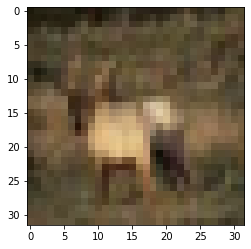

In [36]:
# plot a SINGLE image
image = x_train[1]
label = [idx_to_class[y_train[1]]]
plot_one_image(x_train[1], [idx_to_class[y_train[1]]]) 



The next step is to build a classifier using neural networks.

# Milestone 3. Building a Neural Networks (Perceptron)

![A 2 layer neural network](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)


Each orange and blue node is a neuron. The network itself is composed of a bunch of neurons that talk to each other and eventually give us a prediction. 

**In terms of this problem, what do each of the 4 blue neurons correspond to?**

*   The Output layer is what gives us the classification of the object we are trying to determine




## Building the networks

**Run the Cell Below to Import Tensorflow, our Machine Learning tool.**


In [37]:
# grab tools from our tensorflow and keras toolboxes!
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

Before we train the model or use it to predict something, we have to **create** the model. 

In [38]:
# create our model by specifying and compiling it
model = Sequential()
model.add(Dense(4, input_shape=(3,),activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error'])


**Here is a walk though what each of these lines of code means.**


**1. Specify model**

```
model = Sequential()
```
In this line of code, we build our network where the information flows from left to right through the network in one direction as opposed to multiple directions. Neurons on the right never pass informations to neurons on the left of it. 


**2. Add layers to the network**
```
model.add(Dense(4,input_shape = (3,), activation = 'sigmoid'))
```
In this code, we `add` a `layer` of neurons to our network. 

This layers consists of 4 neurons. Each neuron is dense and connects to all of the previous layer's inputs and all of the subsequent layers outputs. We specify that there are 3 inputs here.



```
model.add(Dense(1, activation = 'linear'))
```
This code adds another layer to the network that has 1 neuron. This one neuron is used to predict a continuous value.

**3. Turn the model on by compiling it** 

After having built the network, we want to train and use it, so we have to 'turn it on' and 'compile' it. To turn it on, we have to specify at the very least, a loss, an optimizer, and some ways of evaluating the model (metrics). 

```
model.compile(loss='mean_squared_error',
optimizer = 'adam',
metrics = ['mean_squared_error'])
  ```

Once we've created our network, we can use it very simply. Just like we did with sklearn, we define our input data (x), the true predictions from that data (y), and then train our model with `fit`. 

```
model.fit(x, y)
```


To use the model, you can use it to predict something with:
```
y = model.predict_classes(x)
```



# Milestone 4. Applying Neural Networks to Recognizing Vehicles


## Model Architecture


In our problem, we are given `images` of shape `(32, 32, 3)`, each assigned to one of 3 labels: car, truck, others. We want to identify the key things that we need to design our network. 





## Activity 1. Building our custom neural network

### Key Points 

We will build a simple 2-layer network for the model


For our model, we have as our layers: 
* Input Layer:  However many inputs there are.
* Layer 1 (Hidden): 128 neurons that are activated by `'relu'`
* Layer 2 (Output): 3 neurons (1 per possible predicted class) that should have an appropriate activation. 
* We will compile with the `optimizers.SGD(lr=1e-3, momentum=0.9)` optimizer





###Build The Model



In [39]:
perceptron = Sequential()

perceptron.add(Flatten(input_shape = (32,32,3)))
perceptron.add(Dense(128, activation='relu'))
perceptron.add(Dense(3, activation = 'softmax'))
perceptron.compile(loss = 'categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-3, momentum=0.9), metrics = ['accuracy'])


### Training the model 



Let's now train our perceptron on images from the train data. 





Before training the model, we need to preprocess the data for better training. 
Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network. Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation. We have implemented this in the `normalize(input_data)` for you.

Besides, we need to convert the label for each image into a one-hot vector, which means, for example, we represent label 2 (truck) as a vector `[0, 0, 1]`, so that the model output can be directly compared with the data label. This has been implemented in the `label_to_onehot(labels)` function.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
monitor = ModelCheckpoint('./model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

# Normalize the data.
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

# Convert labels into one-hot numpy arrays.
y_train_onehot = label_to_onehot(y_train)
y_test_onehot = label_to_onehot(y_test)

history = perceptron.fit(x_train_norm, y_train_onehot, epochs = 10, validation_data = (x_test_norm, y_test_onehot), shuffle = True, callbacks = [monitor])



Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8663 - accuracy: 0.6305 - val_loss: 0.7416 - val_accuracy: 0.6920
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6730 - accuracy: 0.7214 - val_loss: 0.7148 - val_accuracy: 0.6993
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6040 - accuracy: 0.7563 - val_loss: 0.6924 - val_accuracy: 0.7153
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5561 - accuracy: 0.7765 - val_loss: 0.6919 - val_accuracy: 0.7217
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5131 - accuracy: 0.7969 - val_loss: 0.6725 - val_accuracy: 0.7200
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4794 - accuracy: 0.8143 - val_loss: 0.6845 - val_accuracy: 0.7300
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4379 - accuracy: 0.8307 - val_loss: 0.6933 - val_accuracy: 0.7287
Epoch 

As our model trained, it told us a few things. The most important things to us are:
* how accurate it was when training on the training set (reported as `acc`) 
* how accurate it was on the test set (reported as `val_acc`)


We can actually plot how how well our model did across epochs using the model's `history`.


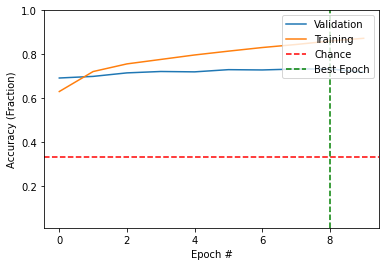

In [ ]:
### YOUR CODE HERE
plot_acc(history)

### END CODE